In [1]:
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Sequential, load_model
from keras.layers.core import Activation
from keras.models import Model
from keras import backend as K
from keras.utils import np_utils

from keras.datasets import mnist
import numpy as np

import matplotlib.pyplot as plt

from keras import regularizers

Using TensorFlow backend.


In [2]:
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [3]:
# Input placeholder
input_img = Input(shape=(784,))

# Encoder architecture
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

# Decoder architecture
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# autoencoder - model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

# compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 6s 106us/step - loss: 0.2353 - val_loss: 0.1626
Epoch 2/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1470 - val_loss: 0.1348
Epoch 3/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1294 - val_loss: 0.1222
Epoch 4/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1201 - val_loss: 0.1152
Epoch 5/50
60000/60000 [==============================] - 6s 103us/step - loss: 0.1137 - val_loss: 0.1097
Epoch 6/50
60000/60000 [==============================] - 6s 105us/step - loss: 0.1093 - val_loss: 0.1065
Epoch 7/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1065 - val_loss: 0.1048
Epoch 8/50
60000/60000 [==============================] - 6s 98us/step - loss: 0.1043 - val_loss: 0.1023
Epoch 9/50
60000/60000 [==============================] - 6s 99us/step - loss: 0.1024 - val_loss: 0.1003
Ep

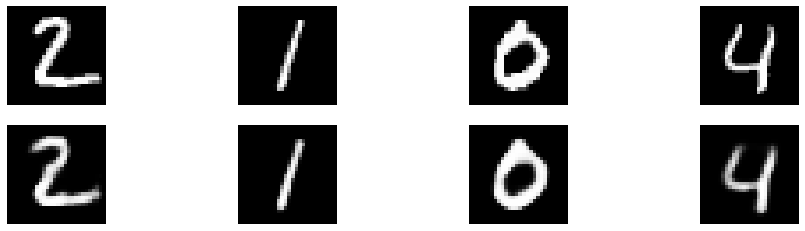

In [6]:
# decoded_imgs - decoded representation of test image
decoded_imgs = autoencoder.predict(x_test)

n = 5  # Display 4 images
plt.figure(figsize=(20, 4))
for i in range(1, n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()